# Three Sided Market Model

The design requirement that underpins the three-sided market archetype is that it supports ‘Community-Corporation Substitutability’. That is to say that a community coordinating through technology such as decentralized ledgers can functionally fulfill a role in the economy that is currently fulfilled by a corporation without the users of that corporate  product knowing or caring that the provider is a community. 

In particular, the ‘Three-Sided Market’ archetype is for platform business where the product being produced enables transactions between a service provider and service consumer. The reference example for this case is a ride sharing app such as Uber. In this case drivers would be providers and riders would be consumers. The corporation Uber is the producer, and in our three-sided-market that role will be spread to a decentralized community collectively providing all of the functions required for users (providers and consumers) to have an equivalent user experience.

The design challenge posed is that of crafting economic mechanisms and policies that ensure that community is able to thrive; like a corporation it must remain financially solvent, but unlike a corporation there need not be expectations of forced growth or outsized profits. Without a need to extract rent to meet corporate goals, the dynamic resource allocation problem required to maintain a healthy economy is while challenging, fundamentally more tractable than a quest for ever growing profits. 

Definition: ‘Community-Corporation Substitutability’
- An automated resource allocation system that is substitutable for a corporation from an external viewpoint but internally is a fair and vibrant loosely-coupled system of peer contributors.
- A system that is inherently more like a biological system from an antifragility perspective.
- A biology inspired loosely-coupled peer production community that can interact with the legacy corporate economy.

This work is part of the ongoing economic systems research at BlockScience. We would be thrilled to have you build on our work, but please cite us if you do. 

Models presented are note predictions or final designs, merely 'what-if' explorations of complex socio-technical systems. Contact media@block.science with interest in our methods and tools.

In [1]:
from IPython.display import Image

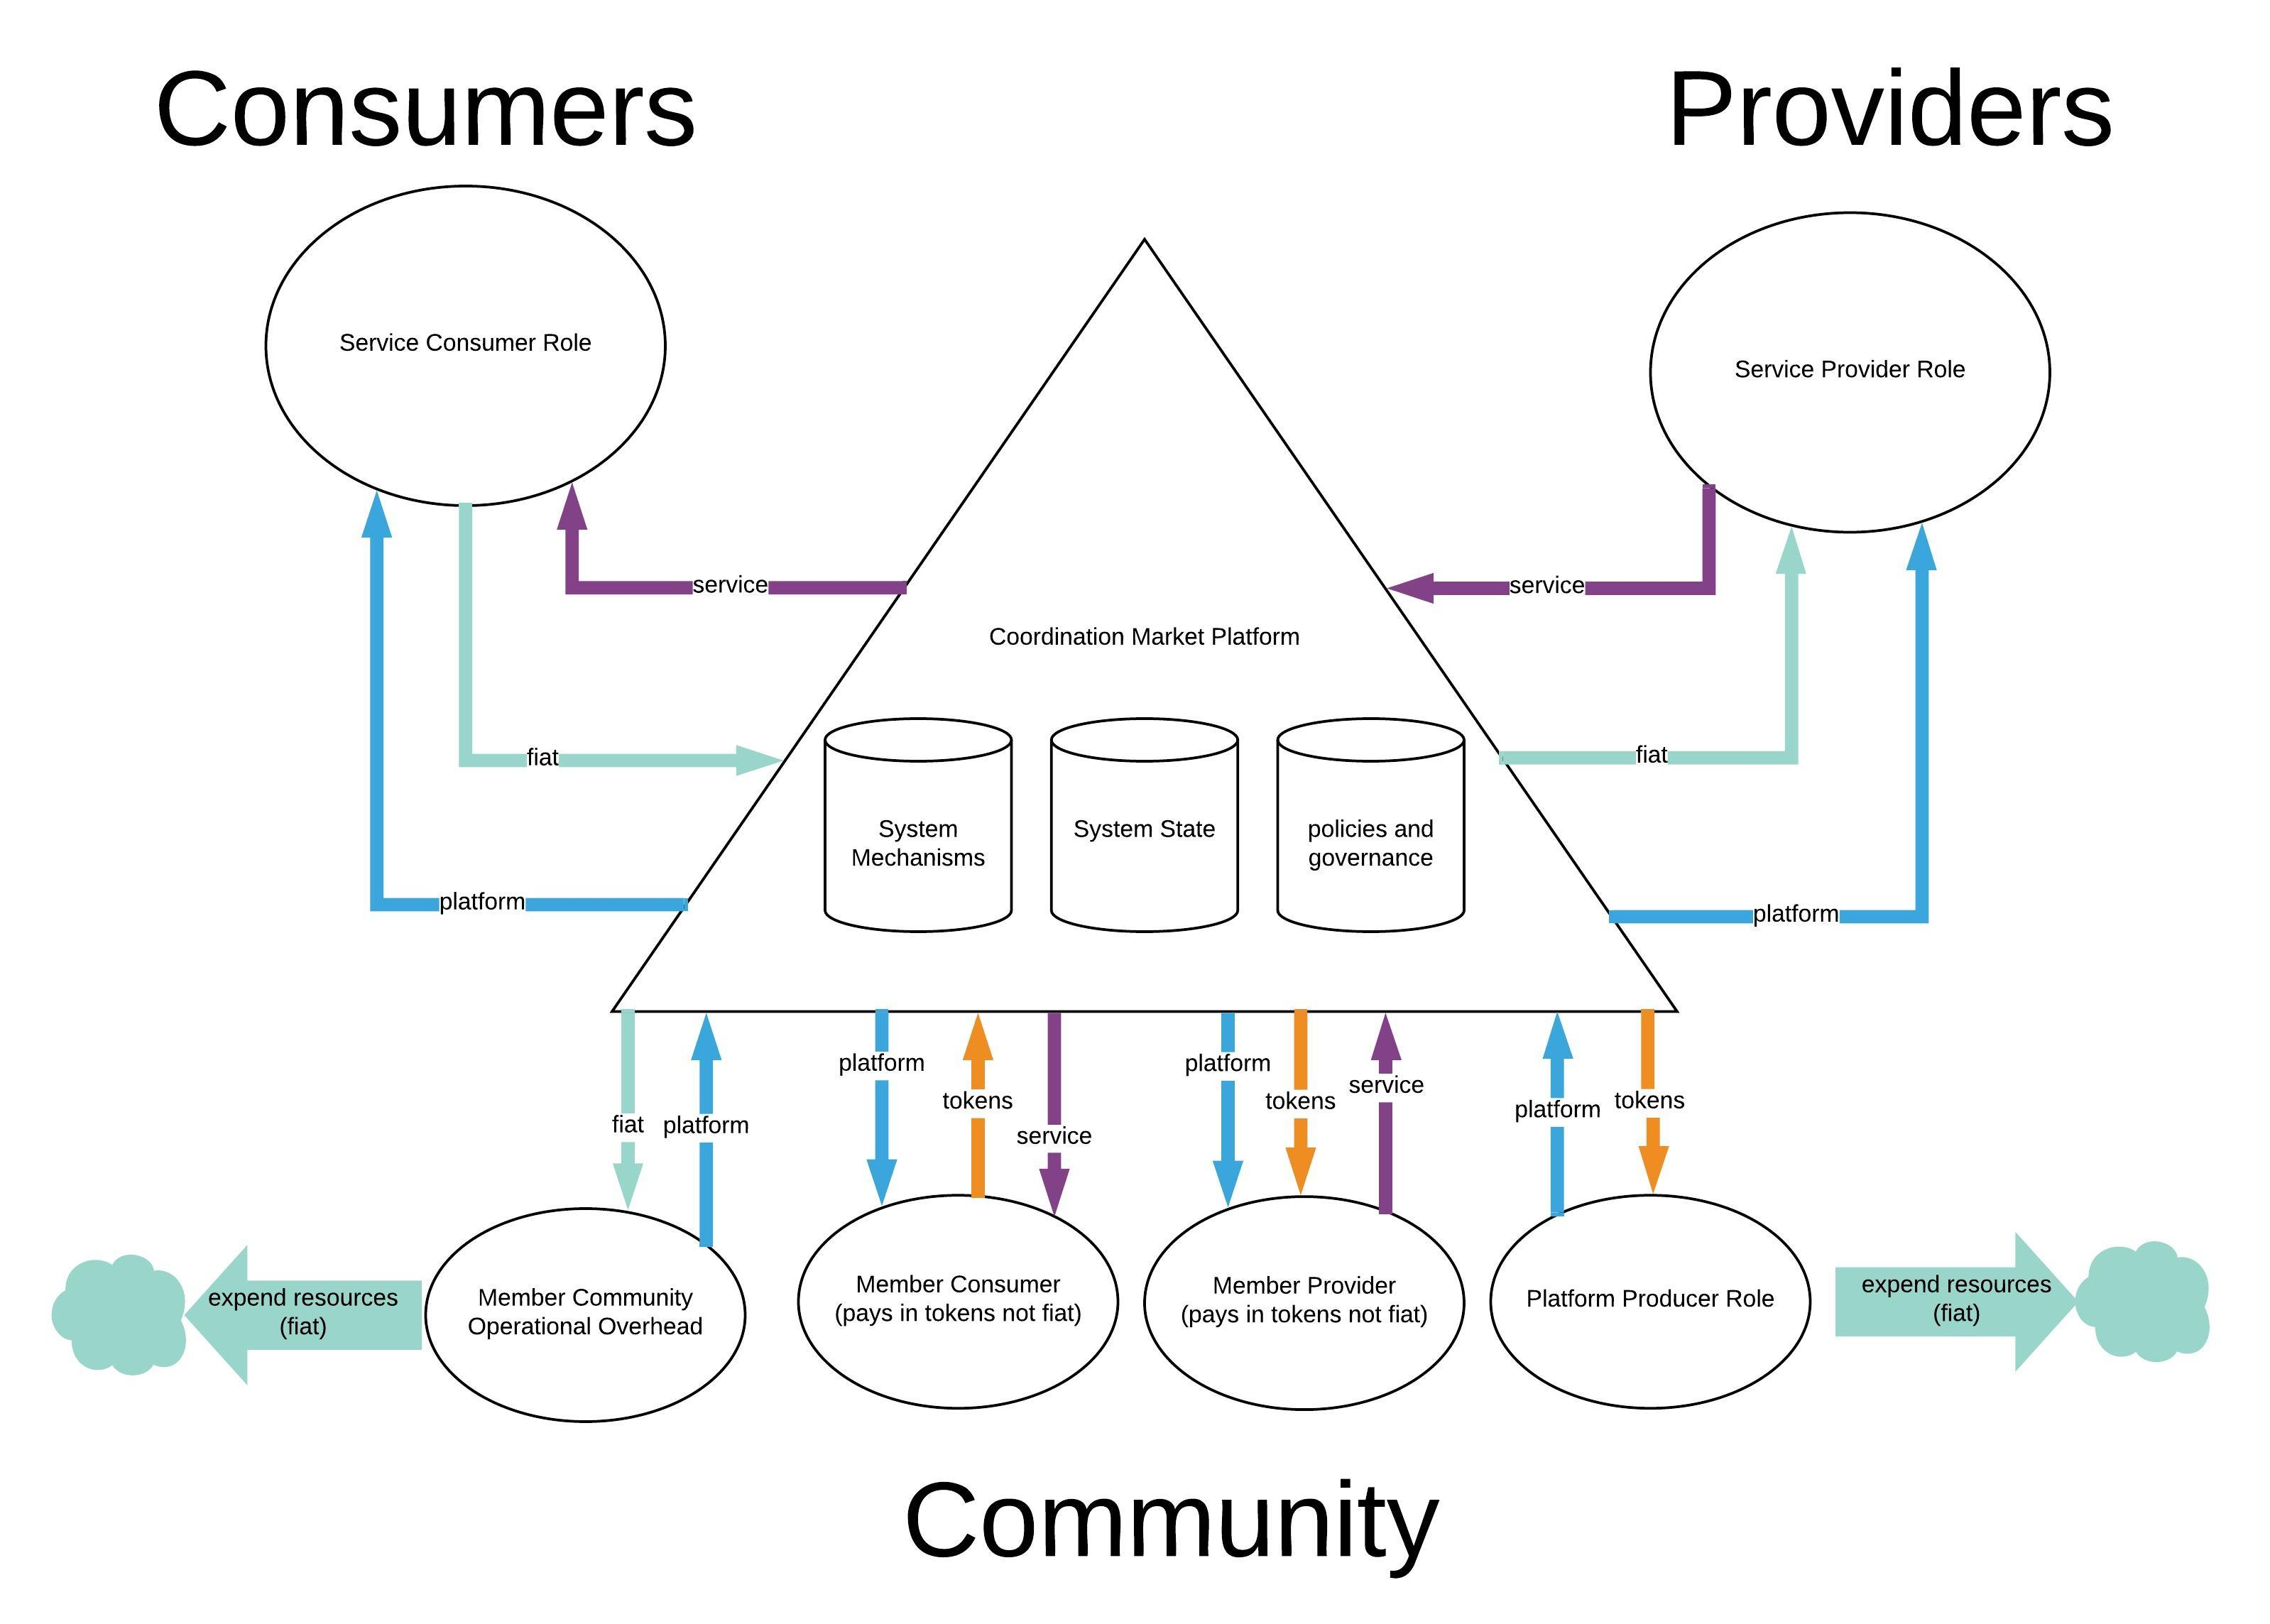

In [2]:
Image(filename='threesidedmarket.jpeg')

Map for of differential game model configuration. Trigger signals are now deprecated, cadCAD works without them. The diagram below helps breakdown the flow from decisions to state changes

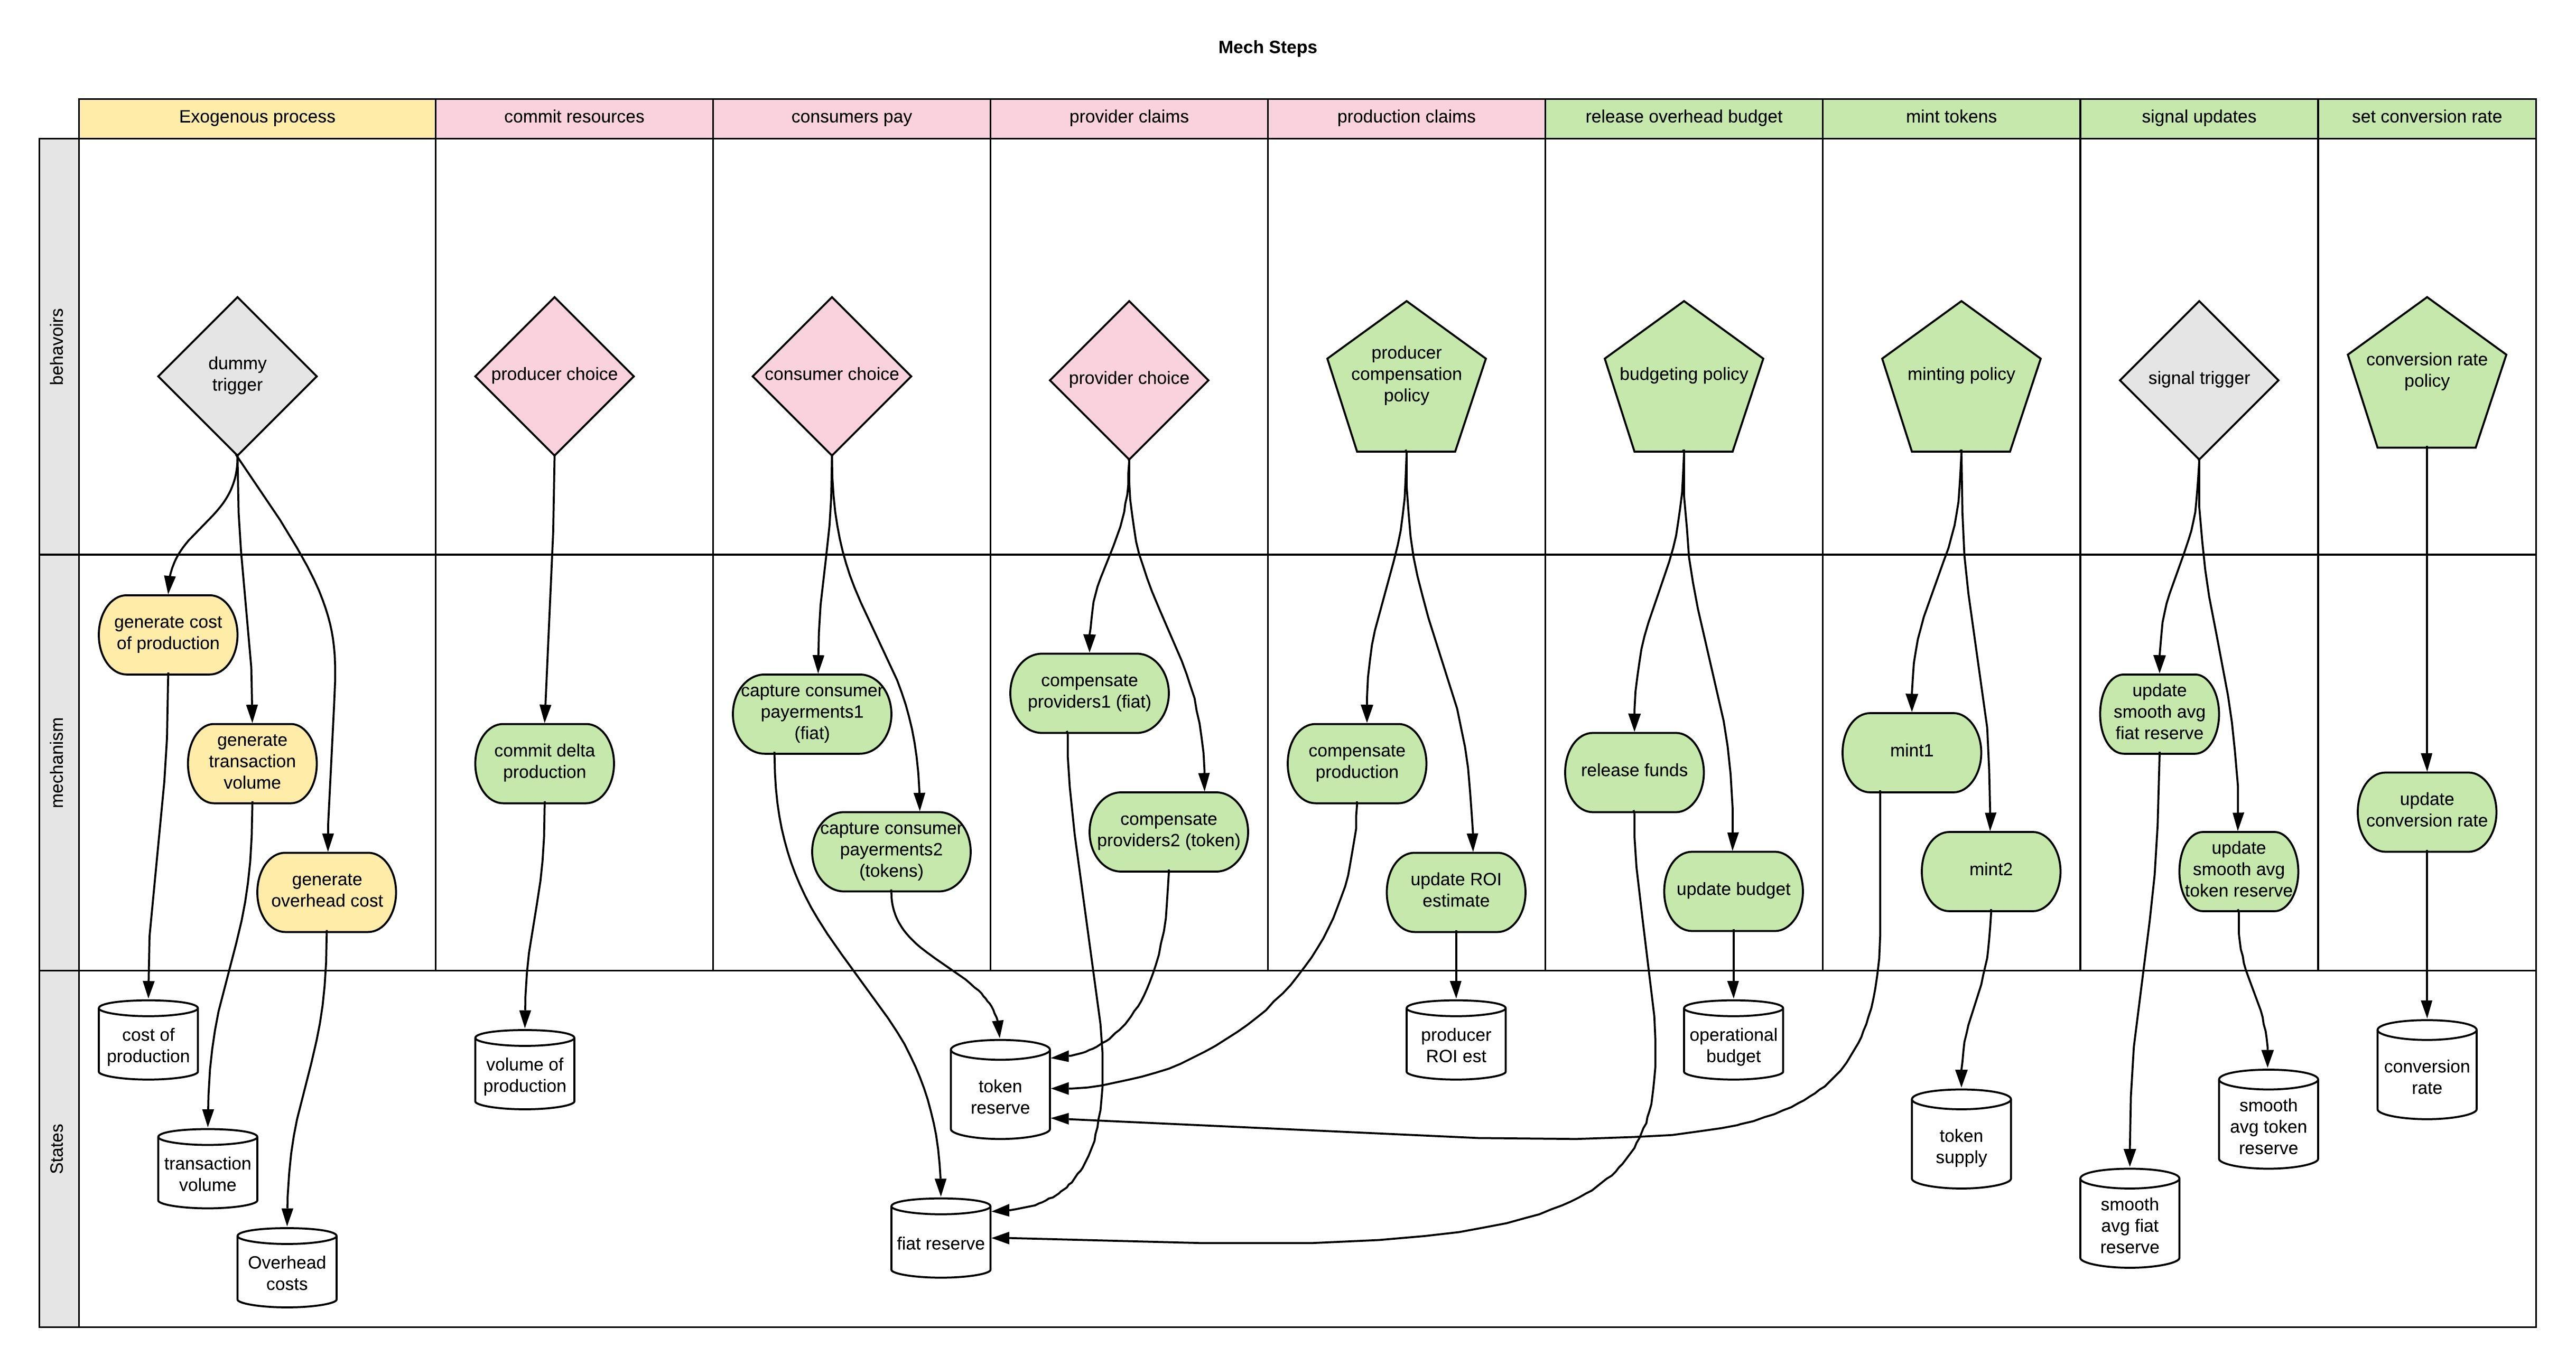

In [3]:
Image(filename='3SM-mechsteps.jpeg')

## Stochastic Processes 
Define generator processes that characterize the world outside the system. In future versions ingest data and fit stochastic process models then draw different realizations of those stochastic process models for Monte Carlo Sims

Consider the driving stochastic process 'tx_volume_generator' which determines the 'tx_volume' $A_t$ of service provided and consumed during one discrete period $t$.
The stochastic process has been modeled as
\begin{equation}
A_t = A_{t-1} + \Delta A_t 
\end{equation}
with $\Delta A_t = A_t-A_{t-1}$ determined by the stochastic process:
\begin{equation}
\Delta A_t = 2\eta u_t A_{t-1} \cdot \left(1-\frac{A_{t-1}}{A_{\max}}\right)
\end{equation}
where the parameter $\eta$ is the expected per period growth rate (prior to accounting for the saturation effect)
and $u_t$ is a random variable drawn from the uniform distribution $\mathcal{U}_{[0,1]}$. The quantity $A_{\max}$ is a maximum addoption, and the term $\left(1-\frac{A_{t-1}}{A_{\max}}\right)$ provides a saturation effect on the stochastic process.

Text(0, 0.5, 'volume')

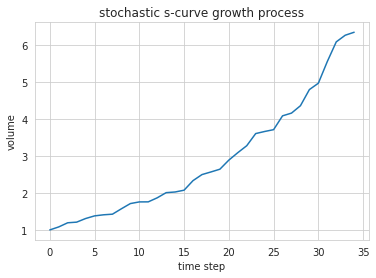

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from model import config

sim_config,state_variables,partial_state_update_blocks = config.get_configs()

# #sweep realization if desired to spotcheck
# #ideally configure to widget as in 'SIR example output'
length = sim_config[0]['T']
v = np.zeros(length[-1])
v[0] = 1
for i in length[1:-1]:
    #todo
    #still need wrapper to plug in actual function above
    v[i] = v[i-1]*(1+2*sim_config[0]['M']['eta']*np.random.rand()*(1-v[i-1]/sim_config[0]['M']['tampw']))
    
plt.plot(v)
plt.title('stochastic s-curve growth process')
plt.xlabel('time step')
plt.ylabel('volume')

## Run simulation

In [1]:
# Experiments
from model import run
from model.parts.utils import *
pd.options.display.float_format = '{:.2f}'.format


df = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 36, 23, 100, 12)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (36, 23, 100, 12)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 12.61s


Continuing to build this models documentation will include markdown explanations of the remains driving stochastic processes as above with adoption dynamics. Note that these are assumptions and a variety of different conditions should tested.

In [2]:
mean_df,median_df,std_df,min_df = run.postprocessing(df)

In [3]:
median_df.describe()

,timestep,fiat_reserve,overhead_cost,operational_budget,token_reserve,token_supply,tx_volume,conversion_rate,cost_of_production,volume_of_production,producer_roi_estimate,smooth_avg_fiat_reserve,smooth_avg_token_reserve,simulation,subset,run,substep
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,18.50,36758.60,513.68,25000.00,132282.30,186007.94,4705.22,2.83,6.25,161.62,0.75,32261.11,96197.56,0.00,0.00,50.50,9.00
std,10.54,7363.18,1.01,0.00,48949.71,86096.84,2902.17,0.97,1.21,85.94,0.67,5675.12,45829.59,0.00,0.00,0.00,0.00
min,1.00,25492.86,511.70,25000.00,33350.05,34750.00,1125.08,1.03,4.60,22.25,-0.01,25049.29,25835.01,0.00,0.00,50.50,9.00
25%,9.75,30400.13,512.87,25000.00,97030.81,116000.78,2178.92,2.05,5.35,98.38,0.14,27112.03,55574.71,0.00,0.00,50.50,9.00
50%,18.50,36508.73,513.99,25000.00,139897.47,190417.34,3869.44,3.11,5.94,159.65,0.54,31406.06,97634.76,0.00,0.00,50.50,9.00
75%,27.25,42742.30,514.53,25000.00,172009.16,258574.06,7211.55,3.68,6.98,248.20,1.38,36797.81,135569.47,0.00,0.00,50.50,9.00
max,36.00,49676.53,514.84,25000.00,203377.09,320997.11,10583.23,3.94,9.47,264.20,1.85,42989.97,169338.99,0.00,0.00,50.50,9.00


In [4]:
median_df.tail()

,timestep,fiat_reserve,overhead_cost,operational_budget,token_reserve,token_supply,tx_volume,conversion_rate,cost_of_production,volume_of_production,producer_roi_estimate,smooth_avg_fiat_reserve,smooth_avg_token_reserve,simulation,subset,run,substep
31,32,46400.75,514.84,25000.00,188731.23,293144.17,8369.14,3.85,5.66,120.09,0.04,40078.24,154151.62,0.00,0.00,50.50,9.00
32,33,47204.06,514.43,25000.00,192322.02,300212.73,9323.52,3.87,5.69,117.67,0.09,40790.82,157968.66,0.00,0.00,50.50,9.00
33,34,48015.65,514.52,25000.00,195961.86,307210.60,9777.59,3.90,5.96,115.99,0.12,41513.30,161767.98,0.00,0.00,50.50,9.00
34,35,48850.50,514.56,25000.00,199657.95,314138.50,10392.79,3.92,6.22,114.87,0.15,42247.02,165556.98,0.00,0.00,50.50,9.00
35,36,49676.53,514.62,25000.00,203377.09,320997.11,10583.23,3.94,6.32,114.19,0.18,42989.97,169338.99,0.00,0.00,50.50,9.00


<AxesSubplot:xlabel='timestep'>

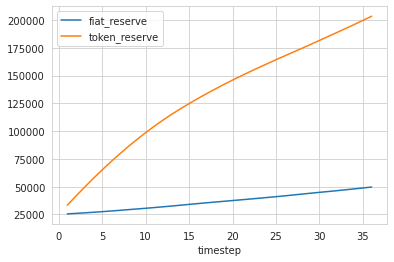

In [5]:
median_df.plot(x='timestep', y = ["fiat_reserve", "token_reserve"])

In [6]:
y = median_df.pivot(index='timestep', columns='run', values='fiat_reserve')
y2= median_df.pivot(index='timestep', columns='run', values='token_reserve')
median_df["price"] = median_df.conversion_rate.apply(lambda r: 1/r)
y3 = median_df.pivot(index='timestep', columns='run', values='price')

Text(0, 0.5, 'Implied Asset Price Fiat per Token')

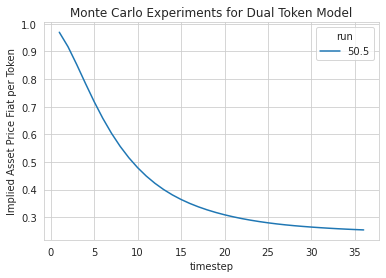

In [7]:
y3.plot()
plt.title("Monte Carlo Experiments for Dual Token Model")
plt.ylabel('Implied Asset Price Fiat per Token')

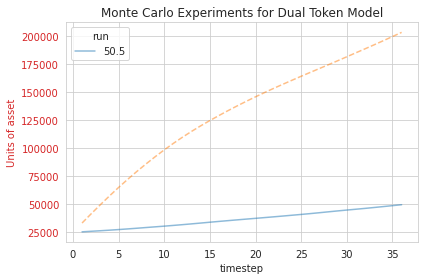

In [8]:
fig, ax1 = plt.subplots()

cp = 100
color = 'tab:red'
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Units of asset', color=color)
y.plot(ax=ax1, alpha = .5)

ax1.tick_params(axis='y', labelcolor=color)

y2.plot(ax=ax1,legend = False, style='--',alpha=.5)
color = 'tab:black'


plt.title("Monte Carlo Experiments for Dual Token Model")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<AxesSubplot:xlabel='timestep'>

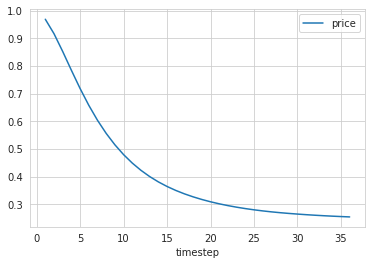

In [9]:
median_df["price"] = median_df.conversion_rate.apply(lambda r: 1/r)
median_df.plot(x='timestep', y = "price")

I find this outcome particularly interesting as the J-curve is associated with SaaS startups who initially burn down capital and eventually gain enough tracion to halt losses before hitting a scale that results in accumlating revenues. 

In this case, the goal is not to accumulate revenues but we have not yet implemented a policy that aims to help redistribute excess revenues to the community for improvement of the platform. In my opinion that's the next step in this model, but first the documentation needs to be improved.

<AxesSubplot:xlabel='timestep'>

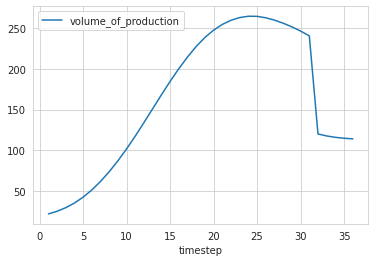

In [10]:
median_df.plot(x='timestep', 
         y = "volume_of_production")

<AxesSubplot:xlabel='timestep'>

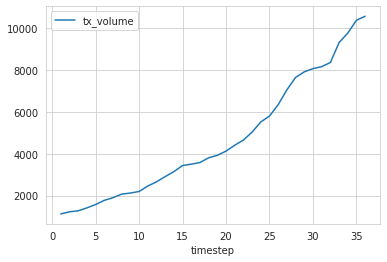

In [11]:
median_df.plot(x='timestep', 
         y = "tx_volume")

<AxesSubplot:xlabel='timestep'>

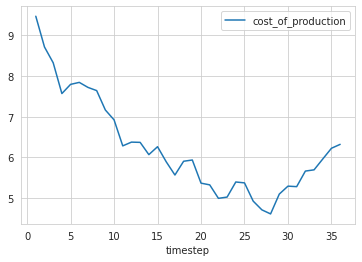

In [12]:
median_df.plot(x='timestep', 
         y = "cost_of_production")

<AxesSubplot:>

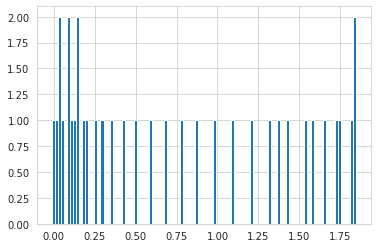

In [13]:
median_df.producer_roi_estimate.hist(bins=100)

## Conclusion

We have walked through a basic dynamical system ecosystem model taking in some external variables and seeing how the system responds to these signals and evolves. We observe that the policy and pricing incentives built into the model represent a successful business model. Now, this is an extremely simplistic model and lacks more rigorous assumptions and testing, but provides an excellent starting point for showing how we model dynamic complex systems. Significantly what makes our modeling approach so powerful, is we can A/B Test, or in other words, try slightly different policies and see how the system interacts and how the outputs we are concerned about respond. It is a very effective mechanism for making business decisions. Our methodologies along with the cadCAD tool allow us to represent a company’s current business model along with the desired future state and help the company make informed, rigorously tested decisions on how to get you from point a to point b.